In [25]:
import numpy as np

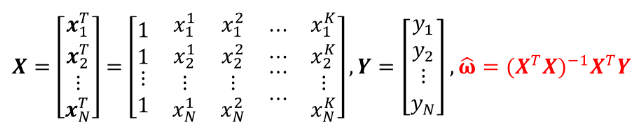

In [26]:
class LinearRegression:
    def __init__(self):
        self.weights = None
        
    def predict(self, X):
        return np.matmul(X, self.weights)

    def loss(self, X, Y):
        return np.average((self.predict(X) - Y) ** 2)

    def train(self, X, Y):
        self.weights = np.zeros((X.shape[1], 1))
        self.weights = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)),X.T), Y)  
#        self.weights = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,Y)) # another way to compute weights
        print("Loss: ",self.loss(X, Y))                     
        return self.weights

In [27]:
# Trainning

y = w1x1 + w2x2 + w3x3 + b = b * 1 + w1x1 + w2x2 + w3x3 where we consider b as w0 and 1 as x0

In [28]:
x1, x2, x3, y = np.loadtxt("pizza_3_vars.txt", skiprows=1, unpack=True)
X = np.column_stack((np.ones(x1.size), x1, x2, x3))
Y = y.reshape(-1, 1)
regressor = LinearRegression()
weights=regressor.train(X, Y)

print("\nWeights: %s" % weights)
print("\nA few predictions:")
for i in range(5):
    print("X[%d] -> %.4f (label: %d)" % (i, regressor.predict(X[i]), Y[i]))

Loss:  6.698177880129862

Weights: [[ 2.41470983]
 [ 1.23376707]
 [-0.02710596]
 [ 3.1246369 ]]

A few predictions:
X[0] -> 45.8707 (label: 44)
X[1] -> 23.2506 (label: 23)
X[2] -> 28.5192 (label: 28)
X[3] -> 58.2354 (label: 60)
X[4] -> 42.8002 (label: 42)


[[ 2.41470983  1.23376707 -0.02710596  3.1246369 ]]
[-9.0, 37.0]
[[-9. 37.]
 [-9. 37.]]
[-9. 37. -9. 37.]
[[-9.0, 2.0], [37.0, 2.0], [-9.0, 37.0], [37.0, 37.0]]


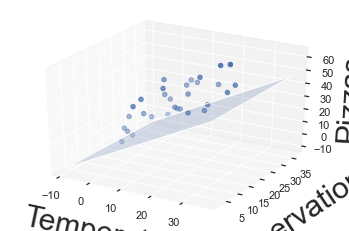

In [29]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Plot a plane that roughly approximates a dataset with two input variables.
# Plot the axes
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})
ax = plt.figure().gca(projection="3d")
ax.set_xlabel("Temperature", labelpad=15, fontsize=30)
ax.set_ylabel("Reservations", labelpad=15, fontsize=30)
ax.set_zlabel("Pizzas", labelpad=5, fontsize=30)

# Plot the data points
ax.scatter(x1, x2, y, color='b')

w=weights.T
print(w)

# Plot the plane
MARGIN = 10
edges_x = [np.min(x1) - MARGIN, np.max(x1) + MARGIN]
edges_y = [np.min(x2) - MARGIN, np.max(x2) + MARGIN]
print(edges_x)
xs, ys = np.meshgrid(edges_x, edges_y)
print(xs)
print(np.ravel(xs)) # 將 xs 拉成一維數列 
print([[x, y] for x, y in zip(np.ravel(xs), np.ravel(ys))])
zs = np.array([w[0,0] + x * w[0,1] + y * w[0,2] for x, y in
              zip(np.ravel(xs), np.ravel(ys))])
ax.plot_surface(xs, ys, zs.reshape((2, 2)), alpha=0.2)

plt.show()
